<a href="https://colab.research.google.com/github/Rayeeeeen/Data-Science-project/blob/main/data_analysis_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

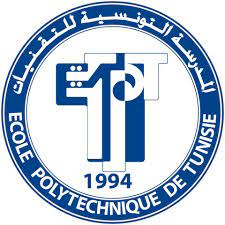


Elaborated by : Mohamed Rayen Ben Abdeslem \

in collaboration with: Sami Chakroun \
\
Superized by : TEKAYA Wajdi


In [ ]:
import yfinance as yf
import pandas as pd


# Download the list of S&P 500 tickers from Wikipedia
sp500_url = 'https://en.wikipedia.org/wiki/List_of_S%26P_500_companies'
sp500_table = pd.read_html(sp500_url)[0]
sp500_tickers = sp500_table['Symbol'].tolist()

# Define the start and end dates for the data
start_date = '2016-01-05'
end_date = '2022-12-31'

#download prices data
datayf = yf.download(sp500_tickers, start=start_date, end=end_date)

# Keep only the 'Close' prices for each stock
prices1 = datayf['Close']

#downloading to check it manually

from google.colab import files

prices.to_excel('output.xlsx', encoding = 'utf-8-sig')
files.download('output.xlsx')

[*********************100%***********************]  503 of 503 completed

2 Failed downloads:
- BF.B: No data found for this date range, symbol may be delisted
- BRK.B: No timezone found, symbol may be delisted


/usr/local/lib/python3.10/dist-packages/pandas/util/_decorators.py:211: FutureWarning: the 'encoding' keyword is deprecated and will be removed in a future version. Please take steps to stop the use of 'encoding'
  return func(*args, **kwargs)


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
#‘movement’ is defined as difference of opening and closing prices of a particular day. Positive movement suggests to go long on stock(buy) and negative movement suggests to short the stock(sell).
prices.head()

,A,AAL,AAP,AAPL,ABBV,ABC,ABT,ACGL,ACN,ADBE,...,WYNN,XEL,XOM,XRAY,XYL,YUM,ZBH,ZBRA,ZION,ZTS
Date,,,,,,,,,,,,,,,,,,,,,
2016-01-05 00:00:00,-0.180000,-0.66,-1.150009,-0.760000,-0.620003,1.160004,-0.040001,0.139999,0.389999,0.329994,...,0.830002,0.380001,0.930000,0.810001,0.009998,-0.575127,1.873787,-1.720001,-0.35,0.500000
2016-01-06 00:00:00,0.489998,1.18,-2.479996,0.035000,1.010002,0.320000,0.250000,0.260000,1.350006,-0.080002,...,-1.290001,0.590000,0.830002,-0.380001,-0.810001,0.222862,1.815536,-1.340000,-0.26,0.750000
2016-01-07 00:00:00,-1.139999,-0.52,4.029999,-0.557501,0.689999,-2.340004,-0.139999,0.363335,-0.589996,-0.290001,...,-3.750000,0.480003,0.170006,0.369999,-0.469997,-0.524803,-0.174751,-1.259998,-0.09,-0.430000
2016-01-08 00:00:00,-0.630001,-0.57,-3.470001,-0.397501,-1.899998,-1.200005,-1.190002,-0.266666,-1.280006,-1.830002,...,-3.769997,-0.400002,-1.659996,-1.899998,-0.500000,-0.790798,-0.640778,-0.549999,-0.58,-1.059998
2016-01-11 00:00:00,-0.770000,0.52,0.919998,-0.110001,-1.980000,-1.450005,-0.040001,-0.126667,0.750000,1.309998,...,-2.219997,0.240002,-1.320000,-1.219997,-0.429996,-0.352264,-1.834953,-0.639999,-0.68,-1.519997


In [ ]:
#here we define the sectors of the companies, will be useful when plotting
sectors=dict()
for company in prices.columns:

  c = yf.Ticker(company)
  try:
    sectors[company]=c.info['sector']
  except:
    sectors[company]='unknown'




In [ ]:
e=set()
for i in sectors:
  e.add(sectors[i])


In [ ]:
#after checking the data manually, it seems that some companies have gone bankrupt before 30/12/2022, these companies do not present a valuable information, however, those that went bankrupt after that date present a perfect examples of failure. we need them basically to avoid the survivorship bias.
#first, we delete a column if it contains exclusively nones, second we replace every none left with the value 0(0 means no profit)

In [ ]:
#empty_cols = [col for col in prices.columns if df[col].isnull().all()]
prices1.dropna(how='all', axis=1, inplace=True)


<ipython-input-8-5b476fc973d8>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  prices.dropna(how='all', axis=1, inplace=True)


In [ ]:
prices1=prices1.fillna(0)
prices1.isnull().values.any()


False

In [ ]:
prices1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1761 entries, 2016-01-05 00:00:00 to 2022-12-30 00:00:00
Columns: 501 entries, A to ZTS
dtypes: float64(501)
memory usage: 6.7+ MB


In [ ]:

# Calculate daily returns for each stock
import numpy as np
returns = prices1.pct_change()
returns = returns.drop(returns.index[0])
returns= returns.fillna(0)
returns.replace([np.inf, -np.inf], 0, inplace=True)
print(max(returns.max()))
returns



0.7459324416617472


,A,AAL,AAP,AAPL,ABBV,ABC,ABT,ACGL,ACN,ADBE,...,WYNN,XEL,XOM,XRAY,XYL,YUM,ZBH,ZBRA,ZION,ZTS
Date,,,,,,,,,,,,,,,,,,,,,
2016-01-06,0.004439,0.017522,-0.026455,-0.019570,0.000174,-0.015286,-0.008388,0.001592,-0.001954,-0.014295,...,-0.051805,0.010538,-0.008321,-0.014486,-0.012476,-0.007080,0.004330,-0.039957,-0.029145,0.000208
2016-01-07,-0.042475,-0.018918,0.011073,-0.042205,-0.002963,-0.031932,-0.023966,-0.001011,-0.029366,-0.020984,...,-0.094070,0.003842,-0.016006,-0.008785,-0.025828,-0.034116,-0.022993,-0.045316,-0.030020,-0.030404
2016-01-08,-0.010513,-0.001978,-0.021971,0.005288,-0.027268,-0.005785,-0.020944,-0.010414,-0.009681,-0.014140,...,-0.040704,-0.010935,-0.020202,-0.028635,-0.009510,-0.013607,-0.004217,-0.002693,-0.011254,-0.014605
2016-01-11,-0.016844,0.017587,0.010236,0.016192,-0.031806,-0.039812,0.001475,-0.002046,0.010489,0.017416,...,-0.016453,0.008016,-0.013389,-0.019477,-0.008438,-0.001761,-0.017233,-0.006582,-0.019919,-0.028335
2016-01-12,0.006589,0.022395,0.006936,0.014513,0.017817,0.001276,0.017923,-0.009520,0.017938,0.004923,...,-0.020602,-0.003839,0.020491,0.010916,0.005575,0.022787,0.030762,0.016820,-0.004148,0.008748
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-12-23,0.001476,0.011943,0.008446,-0.002798,-0.001041,0.004372,0.001389,0.008433,0.005023,0.005735,...,-0.006401,0.012852,0.026445,0.011118,-0.000728,0.000621,-0.000789,0.002869,0.003521,0.005033
2022-12-27,0.002144,-0.014162,0.012144,-0.013878,-0.000674,-0.005941,0.003605,0.003787,-0.002931,-0.009928,...,0.044723,0.009023,0.013894,0.007540,0.009022,0.007758,0.004657,0.011200,0.008050,-0.003156
2022-12-28,-0.009763,-0.016760,0.001931,-0.030685,-0.004663,-0.009704,-0.006816,-0.016033,-0.008255,-0.020174,...,-0.050279,-0.013972,-0.016426,-0.033988,-0.016077,-0.004542,-0.010135,-0.016574,-0.017813,-0.010117


In [ ]:
returns.isnull().values.any()

False

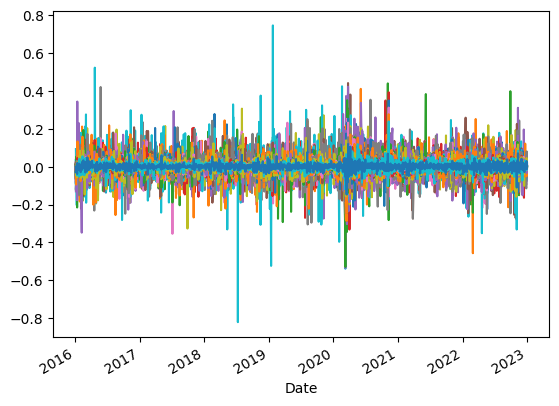

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
returns.plot()
plt.legend().remove()

plt.show()

In [ ]:
#this data presents a high variance, which makes resorting to dimensionality reduction techniques a very useful strategy

In [ ]:
#in the next section,we will apply pca on the data

In [ ]:
#pca
max(returns.max())

0.7459324416617472

In [ ]:
#scaling
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
df=returns
df = pd.DataFrame(scaler.fit_transform(df.values), columns=df.columns, index=df.index)

df.isnull().values.any()

,A,AAL,AAP,AAPL,ABBV,ABC,ABT,ACGL,ACN,ADBE,...,WYNN,XEL,XOM,XRAY,XYL,YUM,ZBH,ZBRA,ZION,ZTS
Date,,,,,,,,,,,,,,,,,,,,,
2016-01-06,0.207718,0.506634,-1.233667,-1.080174,-0.032820,-0.849503,-0.575581,0.047598,-0.161349,-0.712260,...,-1.581442,0.727525,-0.461076,-0.725135,-0.740850,-0.506104,0.217581,-1.637098,-1.306205,-0.034363
2016-01-07,-2.537093,-0.542891,0.501875,-2.262764,-0.215860,-1.748650,-1.566896,-0.096747,-1.842299,-1.024472,...,-2.855851,0.243473,-0.868654,-0.436510,-1.486119,-2.280935,-1.259125,-1.850797,-1.344612,-1.918305
2016-01-08,-0.667074,-0.054987,-1.026317,0.218536,-1.634000,-0.336255,-1.374568,-0.618077,-0.635217,-0.705019,...,-1.246715,-0.824768,-1.091166,-1.441553,-0.575322,-0.934585,-0.244323,-0.151134,-0.520838,-0.945994
2016-01-11,-1.037484,0.508512,0.463166,0.788256,-1.898780,-2.174346,0.052031,-0.154125,0.601664,0.767786,...,-0.515463,0.545178,-0.729845,-0.977874,-0.515453,-0.156909,-0.947815,-0.306221,-0.901204,-1.790962
2016-01-12,0.333532,0.646984,0.310557,0.700540,0.996601,0.045161,1.098645,-0.568508,1.058468,0.184692,...,-0.640573,-0.311776,1.066846,0.561047,0.266666,1.454628,1.646134,0.626973,-0.208884,0.491203
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-12-23,0.034386,0.345937,0.380365,-0.203921,-0.103744,0.212393,0.046508,0.426908,0.266509,0.222609,...,-0.212354,0.894787,1.382589,0.571271,-0.085170,-0.000537,-0.059058,0.070652,0.127764,0.262581
2022-12-27,0.073468,-0.405909,0.551390,-0.782824,-0.082344,-0.344668,0.187556,0.169290,-0.221290,-0.508424,...,1.329171,0.618008,0.716991,0.390098,0.459065,0.467987,0.235265,0.402872,0.326551,-0.241400
2022-12-28,-0.623185,-0.480725,0.079064,-1.660920,-0.315061,-0.547958,-0.475564,-0.929639,-0.547717,-0.986637,...,-1.535411,-1.044341,-0.890930,-1.712619,-0.941831,-0.339463,-0.564204,-0.704650,-0.808779,-0.669805


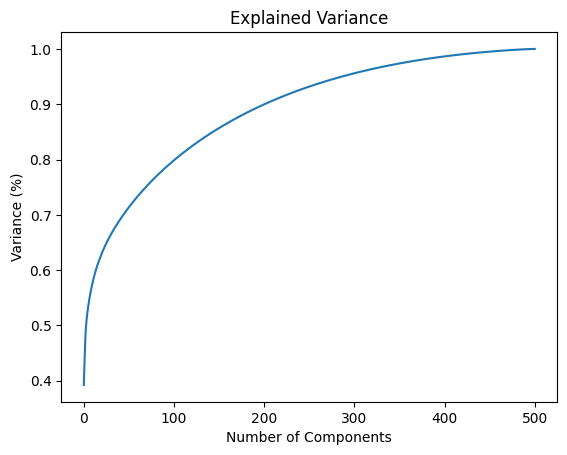

In [ ]:
from sklearn.decomposition import PCA
import numpy as np
import numpy as np
from sklearn.preprocessing import Normalizer
from sklearn.preprocessing import MinMaxScaler, StandardScaler, RobustScaler
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# pass through the scaled data set into our PCA class object
pca = PCA().fit(df)

# plot the Cumulative Summation of the Explained Variance
plt.figure()
plt.plot(np.cumsum(pca.explained_variance_ratio_))

# define the labels & title
plt.xlabel('Number of Components')
plt.ylabel('Variance (%)')
plt.title('Explained Variance')

# show the plot
plt.show()

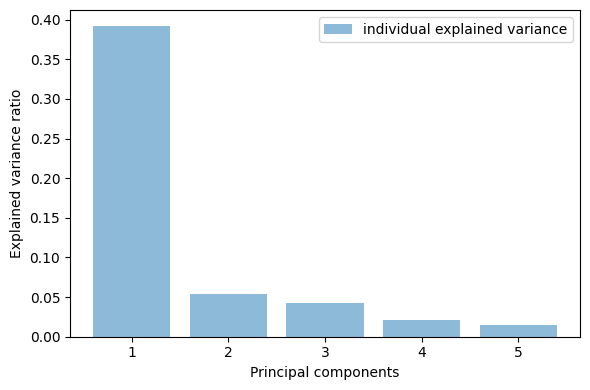

In [ ]:
plt.figure(figsize=(6, 4))

plt.bar(range(1,6),pca.explained_variance_ratio_[:5], alpha=0.5, align='center',
label='individual explained variance')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal components')
plt.legend(loc='best')
plt.tight_layout()

In [ ]:
#this means that the plot that we will obtain will contain less than 50% of the variance(information) contained in the data

['Basic Materials', 'unknown', 'Technology', 'Financial Services', 'Communication Services', 'Real Estate', 'Energy', 'Healthcare', 'Utilities', 'Consumer Cyclical', 'Consumer Defensive', 'Industrials']


<ipython-input-20-9d180a4e64d6>:12: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  colorize = dict(c=data[:, 0], cmap=plt.cm.get_cmap('rainbow', 12))


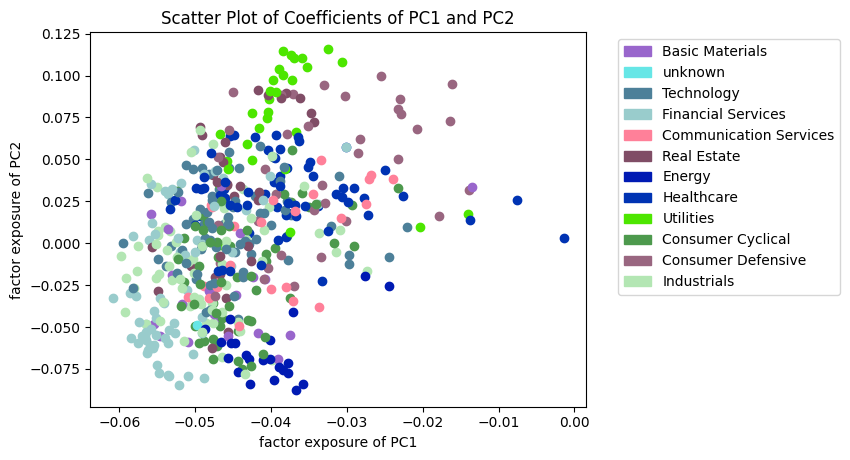

In [ ]:
import matplotlib.patches as mpatches
pca = PCA(n_components=2).fit(df)

factor_exposures = pd.DataFrame(index=["factor 1", "factor 2"],
                                columns=df.columns,
                                data = pca.components_).T
labels = factor_exposures.index
data = factor_exposures.values
sector=list(e)
print(sector)
plt.subplots_adjust(bottom = 0.1)
colorize = dict(c=data[:, 0], cmap=plt.cm.get_cmap('rainbow', 12))
colors=[]
for i in range(12):
    r = np.round(np.random.rand(),1)
    g = np.round(np.random.rand(),1)
    b = np.round(np.random.rand(),1)
    colors.append([r,g,b])





#print(colorize)
for i in range (len(data)):
  #print(sectors[factor_exposures.index[i]])
  plt.scatter(data[i, 0], data [i, 1], color=colors[sector.index(sectors[factor_exposures.index[i]])] )


#plt.scatter(data[:, 0], data [:, 1], **colorize)
plt.title('Scatter Plot of Coefficients of PC1 and PC2')
plt.xlabel('factor exposure of PC1')
plt.ylabel('factor exposure of PC2')

handle=[]
for i in range(len(sector)):

  handle.append(mpatches.Patch(color=colors[i], label=sector[i]))

plt.legend(bbox_to_anchor=(1.05, 1),handles=handle)

In [ ]:
# it seems that some sectors have similar behavior, for instance:
# financial services/consumer cyclical/industrials all vary together
# utilities/real estate vary together
# so in the investment plan, we can consider the s1=(services/consumer cyclical/industrials) as a sector. same for s2=(utilities/real estate).
# now we invest equally in s1, s2 and the remaining sectors.


In [ ]:
# the next section will be dedicated to manifold learning

In [ ]:
print(max(returns.max()))
from sklearn.metrics import pairwise_distances

D = pairwise_distances(returns)
D.shape

0.7459324416617472


(1760, 1760)

/usr/local/lib/python3.10/dist-packages/sklearn/manifold/_mds.py:299: FutureWarning: The default value of `normalized_stress` will change to `'auto'` in version 1.4. To suppress this warning, manually set the value of `normalized_stress`.
  warnings.warn(
<ipython-input-23-b7f5badd9031>:4: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  colorize = dict(c=range(0,D.shape[0]), cmap=plt.cm.get_cmap('rainbow', 1000))


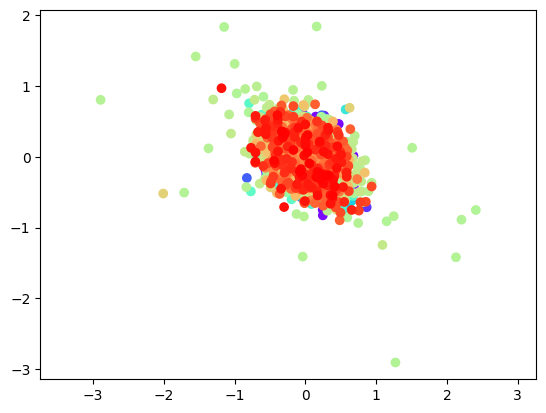

In [ ]:
from sklearn.manifold import MDS
model = MDS(n_components=2, dissimilarity='precomputed')
out = model.fit_transform(D)
colorize = dict(c=range(0,D.shape[0]), cmap=plt.cm.get_cmap('rainbow', 1000))
plt.scatter(out[:, 0], out[:, 1], **colorize)
plt.axis('equal');

/usr/local/lib/python3.10/dist-packages/sklearn/manifold/_mds.py:601: UserWarning: The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/manifold/_mds.py:299: FutureWarning: The default value of `normalized_stress` will change to `'auto'` in version 1.4. To suppress this warning, manually set the value of `normalized_stress`.
  warnings.warn(


(-105.00785101099801,
 12.459981254509122,
 -49.487107944522926,
 83.32693106027165)

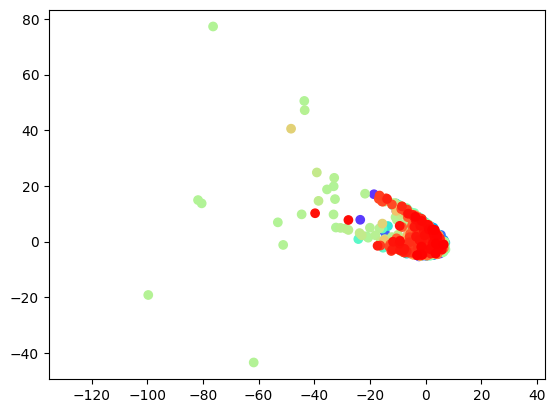

In [ ]:
model = MDS(n_components=2)#euclidian
out3 = model.fit_transform(D)
plt.scatter(out3[:, 0], out3[:, 1], **colorize)
plt.axis('equal')

In [ ]:
#this method fails in clustering the data into different clusters.

K-means clustering

we will start by ploting The variation of opening prices of 2 companies(A and MRK) have been plotted below.

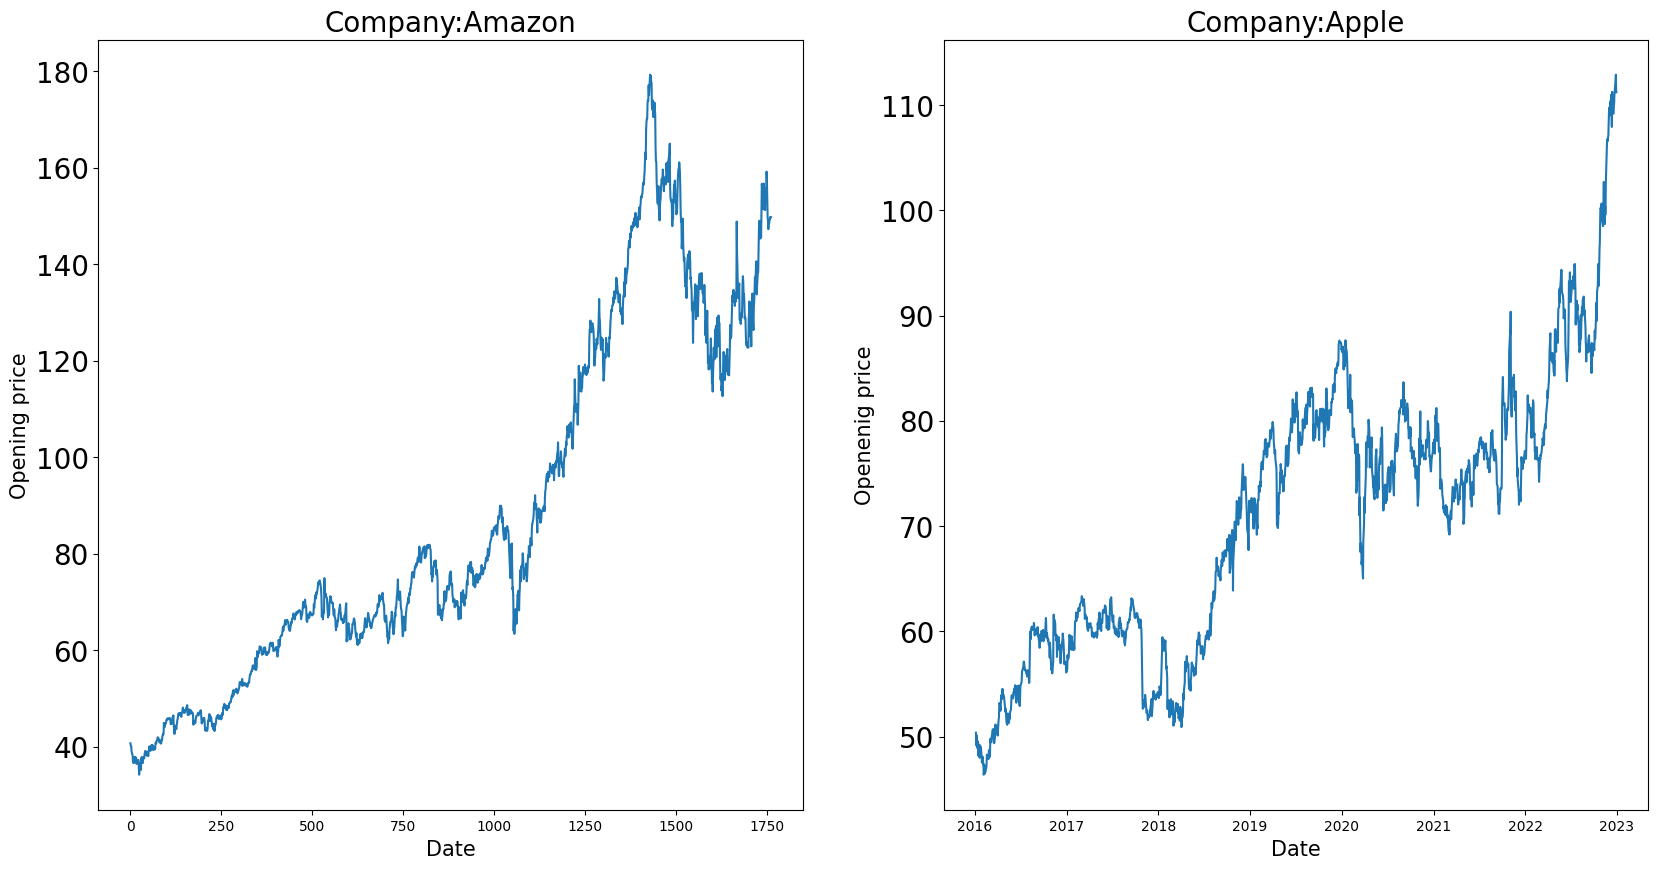

In [ ]:
prices=datayf['Close']-datayf['Open']

plt.figure(figsize = (20,10))
plt.subplot(1,2,1)
plt.title('Company:Amazon',fontsize = 20)
plt.xticks(fontsize = 10)
plt.yticks(fontsize = 20)
plt.xlabel('Date',fontsize = 15)
plt.ylabel('Opening price',fontsize = 15)
plt.plot(np.array(datayf['Open']['A']))
plt.subplot(1,2,2)
plt.title('Company:Apple',fontsize = 20)
plt.xticks(fontsize = 10)
plt.yticks(fontsize = 20)
plt.xlabel('Date',fontsize = 15)
plt.ylabel('Openenig price',fontsize = 15)
plt.plot(datayf['Open']['MRK'])

A’s opening price has increased from 40 to 1670 while Apple’s opening price has increased from 50 to 110. Also A has relatively better steady increase. Thus A has better growth than MRK in the given time period.

‘Movement’ as defined earlier is difference of closing and opening prices of a particular day. The variation of ‘movement’ of amazon in the time period 08/01/2016 to 15/02/2016 :

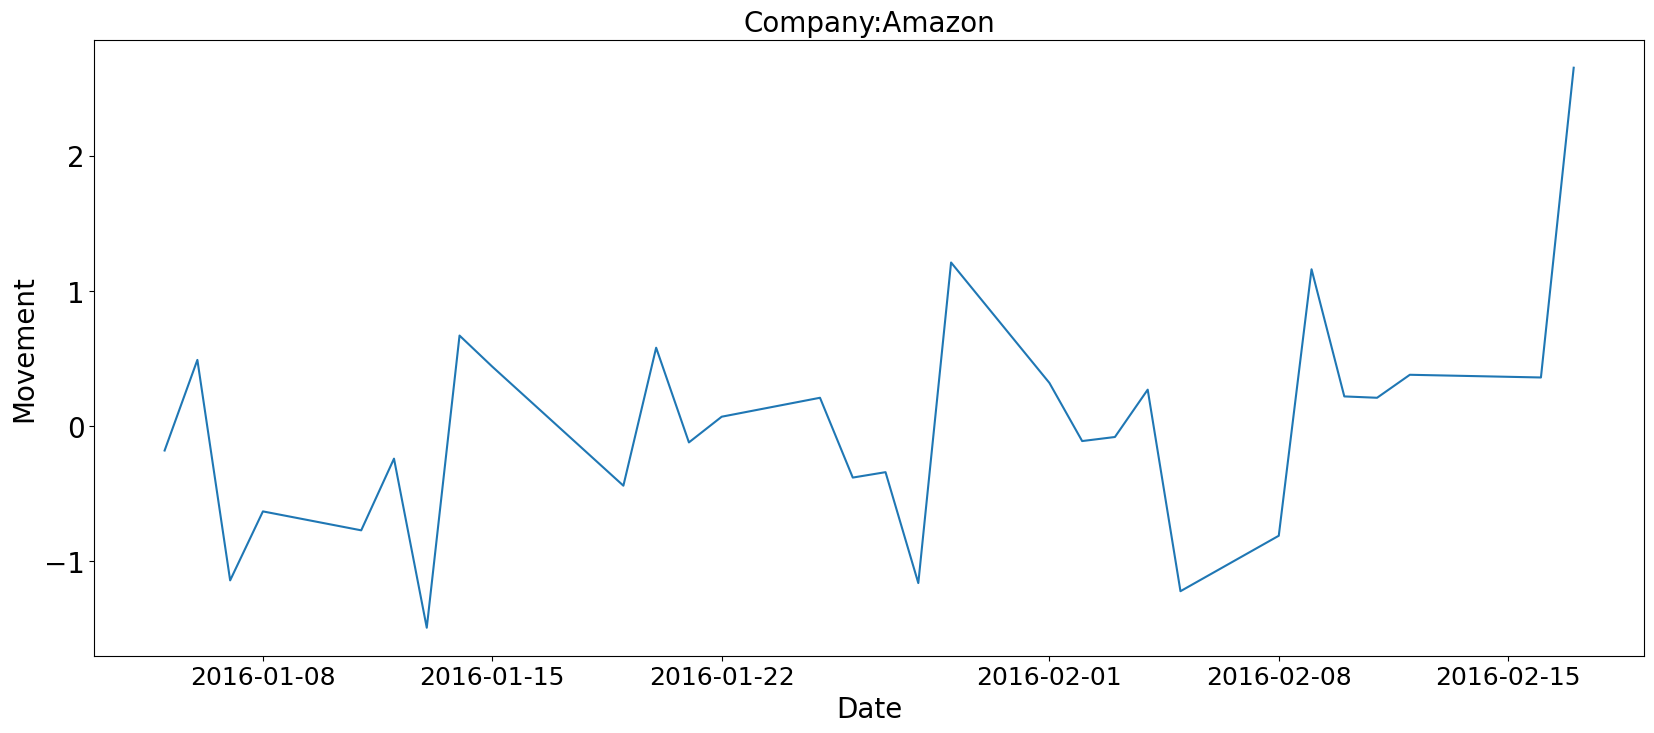

In [ ]:

plt.figure(figsize = (20,8))
plt.title('Company:A',fontsize = 20)
plt.xticks(fontsize = 18)
plt.yticks(fontsize = 20)
plt.xlabel('Date',fontsize = 20)
plt.ylabel('Movement',fontsize = 20)
plt.plot(prices['A'][0:30])

A positive ‘movement’ is desirable which suggests the price has increased during the day.

Another important parameter is ‘Volume’. The ‘Volume’ of stocks traded in the time period from 2016 to 2023 has been plotted below.

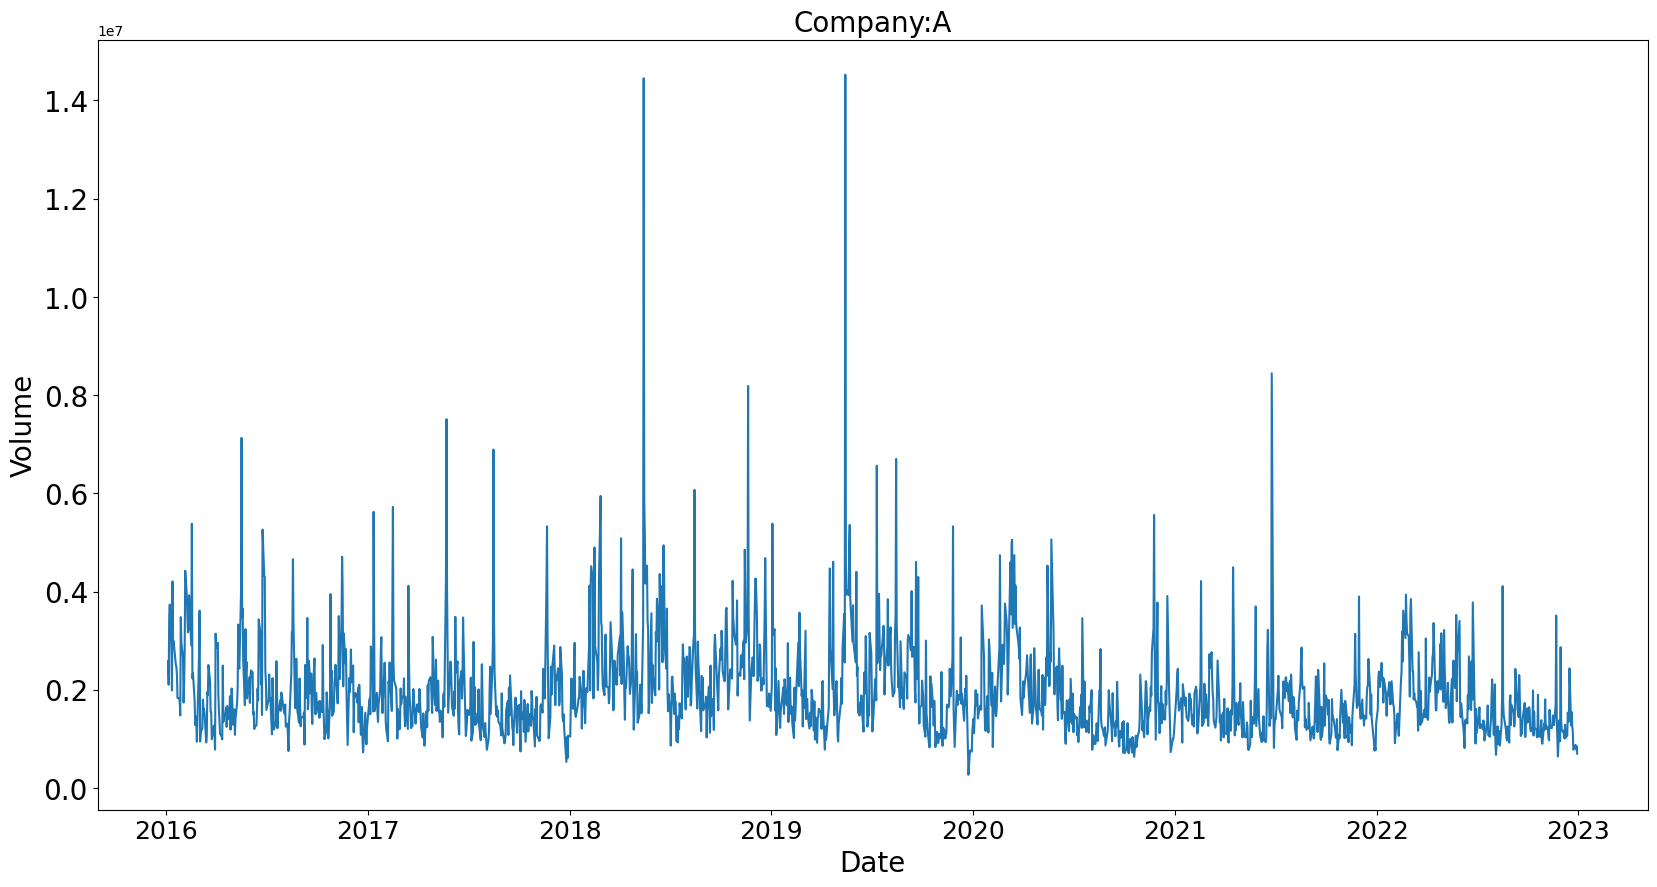

In [ ]:
plt.figure(figsize = (20,10))
plt.title('Company:A',fontsize = 20)
plt.xticks(fontsize = 18)
plt.yticks(fontsize = 20)
plt.xlabel('Date',fontsize = 20)
plt.ylabel('Volume',fontsize = 20)
plt.plot(datayf['Volume']['A'],label = 'Open')

The peaks suggest there are high volumes of stocks traded on certain days. This may be due to restructuring of company’s management, change of ownership, yearly announcements, new ventures and other factors which affect the image of company in the minds of market participants.

The candlestick chart for the first 60 days of A has been plotted below.

In [ ]:
import plotly.graph_objects as go
fig = go.Figure(data=[go.Candlestick(x=df.index,
 open=datayf.iloc[0:60]['Open']['A'],
 high=datayf.iloc[0:60]['High']['A'],
 low=datayf.iloc[0:60]['Low']['A'],
 close=datayf.iloc[0:60]['Close']['A'])])
fig.show()

Candlestick pattern is an important tool of technical analysis of stocks to predict particular market movements.

NEED FOR NORMALIZATION

Let us plot the variation of ‘movement’ of A and MRK.

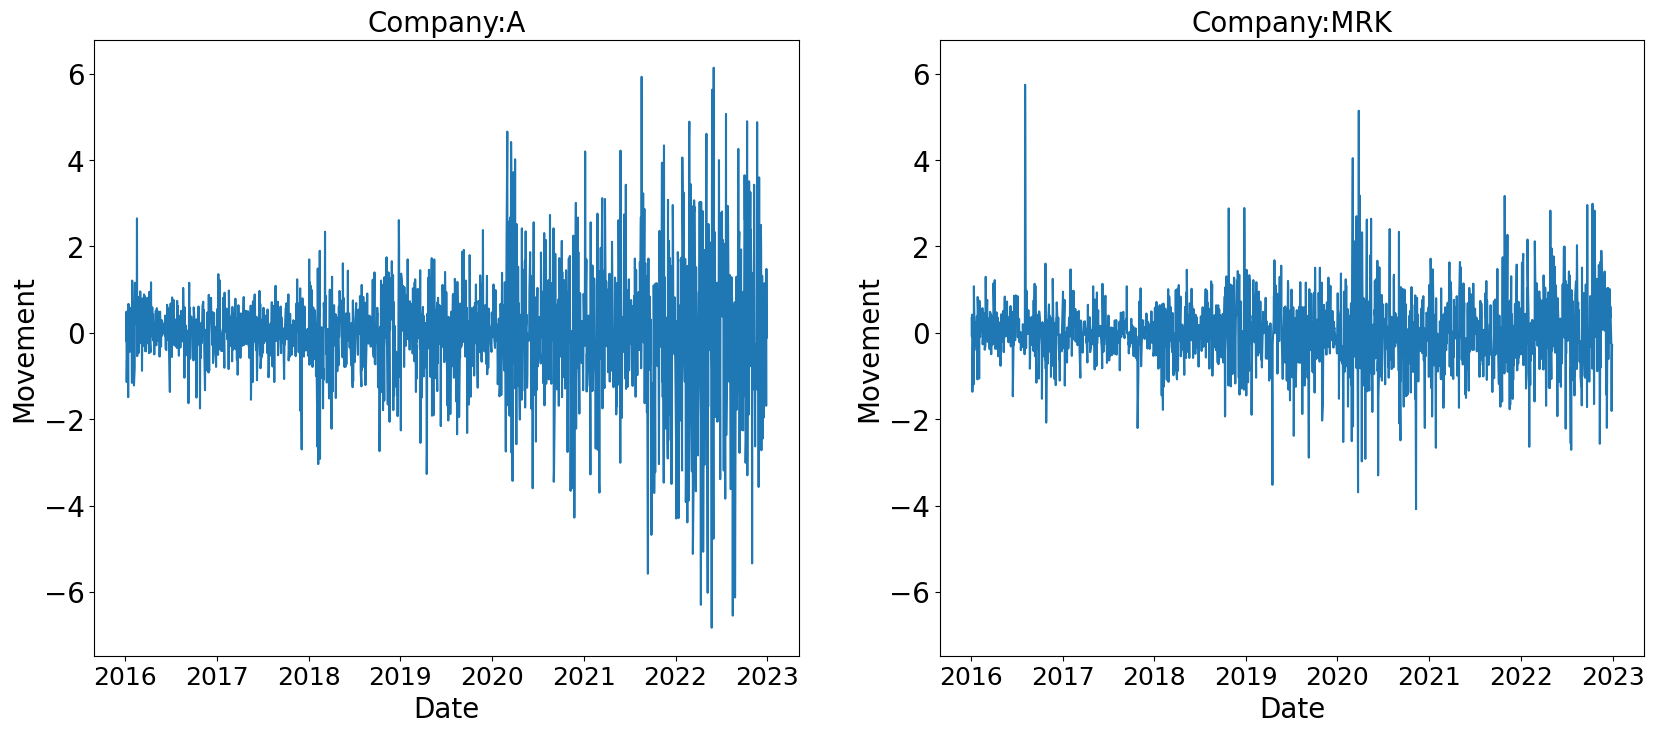

In [ ]:
plt.figure(figsize = (20,8))
ax1 = plt.subplot(1,2,1)
plt.title('Company:A',fontsize = 20)
plt.xticks(fontsize = 18)
plt.yticks(fontsize = 20)
plt.xlabel('Date',fontsize = 20)
plt.ylabel('Movement',fontsize = 20)
plt.plot(prices['A'])
plt.subplot(1,2,2,sharey = ax1)
plt.title('Company:MRK',fontsize = 20)
plt.xticks(fontsize = 18)
plt.yticks(fontsize = 20)
plt.xlabel('Date',fontsize = 20)
plt.ylabel('Movement',fontsize = 20)
plt.plot(prices['MRK'])

Stock prices of Amazon and Apple have different scales. Thus x units of change in stock price of Amazon is not the same as x units of change in stock price of Apple. Some companies are worth a lot more than other companies. Hence the data has to be normalized.

The goal of Normalization is to change the value of numeric columns in the dataset to a common scale without distorting differences in the range of values. It is required only when features have different ranges like in the present scenario.

In [ ]:
prices.dropna(how='all', axis=1, inplace=True)
prices=prices.fillna(0)

normalizer = Normalizer() # Define a Normalizer
norm_movements = normalizer.fit_transform(prices) # Fit and transform

print(norm_movements.min())
print(norm_movements.max())
print(norm_movements.mean())

-0.9883410143917378
0.9873313870571551
0.0005926338481492285


CREATING A PIPELINE

Now we create a pipeline that normalizes the data and then applies K-Means clustering algorithm to cluster companies with similar daily stock movements.

In [ ]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import Normalizer
from sklearn.cluster import KMeans

movements=np.array(prices)
# Define a normalizer
normalizer = Normalizer()
# Create Kmeans model
kmeans = KMeans(n_clusters = 10,max_iter = 1000)
# Make a pipeline chaining normalizer and kmeans
pipeline = make_pipeline(normalizer,kmeans)
# Fit pipeline to daily stock movements
pipeline.fit(movements)
labels = pipeline.predict(movements)

movements[0,:].shape
labels_resized = labels[:501]


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



In [ ]:

df1 = pd.DataFrame({'labels': labels_resized, 'companies': prices.columns})
df1 = df1.sort_values(by='labels', axis=0)
df1


,labels,companies
499,0,ZION
69,0,BR
190,0,FOX
198,0,GEHC
422,0,STZ
...,...,...
402,9,RTX
401,9,RSG
400,9,ROST
107,9,COO


exemple : The companies TFX,TSLA and WEC are clustered together

PCA REDUCTION


The high dimensional data ‘norm_movement’ with 1760 features(1760 days) is reduced to a 2 dimensional data with 2 features(2days) and then k-means clustering is applied. This way we can plot the clustered companies on a two dimensional graph.

Given below is the pipeline which normalizes, reduces (PCA reduction) and applies K-Means clustering algorithm.

In [ ]:
# Define a normalizer
normalizer = Normalizer()
# Reduce the data
reduced_data = PCA(n_components = 2)
# Create Kmeans model
kmeans = KMeans(n_clusters = 25,max_iter = 1000)
# Make a pipeline chaining normalizer, pca and kmeans
pipeline = make_pipeline(normalizer,reduced_data,kmeans)
# Fit pipeline to daily stock movements
pipeline.fit(movements)
# Prediction
labels2 = pipeline.predict(movements)
labels_resized2 = labels2[:501]

# Create dataframe to store companies and predicted labels
df2 = pd.DataFrame({'labels':labels_resized2,'companies':prices.columns}).sort_values(by=['labels'],axis = 0)
df2

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



,labels,companies
306,0,MMM
476,0,WBA
56,0,BAX
148,0,DXCM
92,0,CHRW
...,...,...
447,24,TSLA
451,24,TXN
186,24,FISV
275,24,LIN


The cluster formation with PCA reduction is different from the cluster formation without PCA reduction. The cons of PCA reduction is some details are lost. The results are not very accurate. The pros of PCA reduction is less computational power and easy visualization.

The decision boundary is plotted below :

<Figure size 640x480 with 0 Axes>

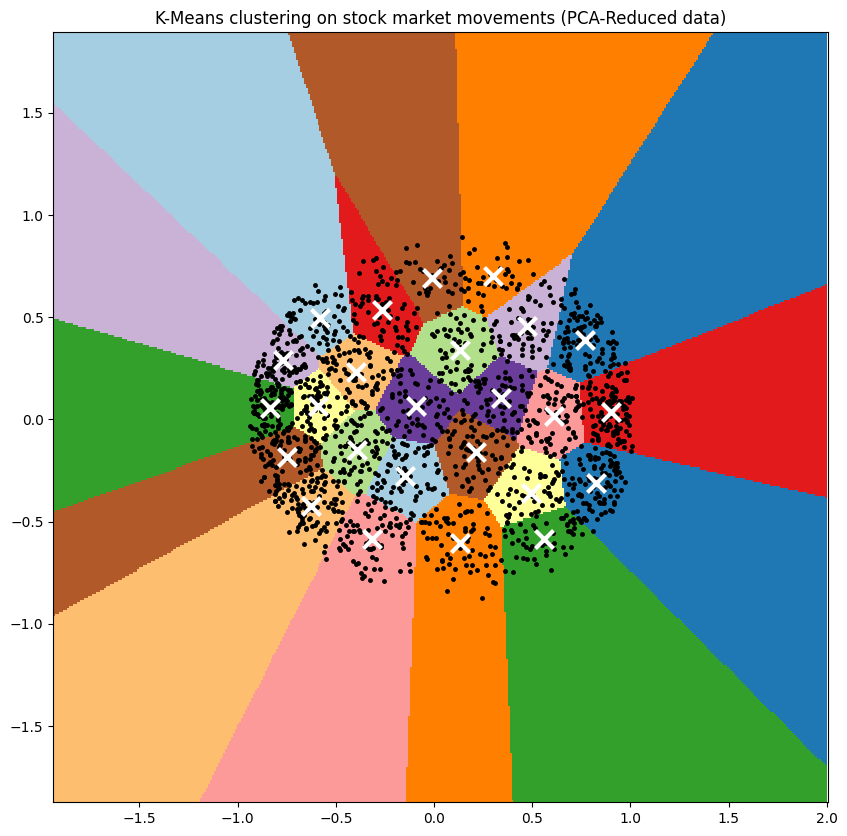

In [ ]:
from sklearn.decomposition import PCA
# Reduce the data
reduced_data = PCA(n_components = 2).fit_transform(norm_movements)
# Define step size of mesh
h = 0.01
# Plot the decision boundary
x_min,x_max = reduced_data[:,0].min()-1, reduced_data[:,0].max() + 1
y_min,y_max = reduced_data[:,1].min()-1, reduced_data[:,1].max() + 1
xx,yy = np.meshgrid(np.arange(x_min,x_max,h),np.arange(y_min,y_max,h))
# Obtain labels for each point in the mesh using our trained model
Z = kmeans.predict(np.c_[xx.ravel(),yy.ravel()])
# Put the result into a color plot
Z = Z.reshape(xx.shape)
# Define color plot
cmap = plt.cm.Paired
# Plotting figure
plt.clf()
plt.figure(figsize=(10,10))
plt.imshow(Z,interpolation = 'nearest',extent=(xx.min(),xx.max(),yy.min(),yy.max()),cmap = cmap,aspect = 'auto',origin = 'lower')
plt.plot(reduced_data[:,0],reduced_data[:,1],'k.',markersize = 5)
# Plot the centroid of each cluster as a white X
centroids = kmeans.cluster_centers_
plt.scatter(centroids[:,0],centroids[:,1],marker = 'x',s = 169,linewidths = 3,color = 'w',zorder = 10)
plt.title('K-Means clustering on stock market movements (PCA-Reduced data)')
plt.xlim(x_min,x_max)
plt.ylim(y_min,y_max)
plt.show()

In [ ]:
%%shell
jupyter nbconvert --to html /content/data_analysis_project.ipynb

[NbConvertApp] Converting notebook /content/data_analysis_project.ipynb to html
[NbConvertApp] Writing 1862570 bytes to /content/data_analysis_project.html
